In [1]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('realestate.csv')

# 2a K Nearest Neighbor

In [3]:
X=data.drop('Y house price of unit area',axis=1)
y=data['Y house price of unit area']
X = X.values
y = y.values
X_start, X_test, y_intermediate, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_start, y_intermediate, shuffle=False,test_size=0.25, random_state=1)

In [4]:
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=5, shuffle=True, random_state=42)
coefs=[]
k_range=range(1,25)
train_errors = []
validation_errors = []
test_errors = []
rmse_val={}
optK=[]
for train_index, val_index in kf.split(X_start, y_intermediate):
        
        #print(train_index, val_index)
        # split data
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        #print(X_train, y_train)
        
        m={}
        for i in k_range:
            #create a new KNN model
            knn_cv = neighbors.KNeighborsRegressor(n_neighbors=i)
            #train model with cv of 5 
            cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
            m[i]=np.mean(cv_scores)
        k=max(m, key=m.get)
        optK.append(k)
        # instantiate model
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, knn)
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, knn)
        print(train_error, val_error, k)
        
        # append to appropriate list
        train_errors.append(math.sqrt(train_error))
        validation_errors.append(math.sqrt(val_error))
        
for train_index, test_index in kf.split(X, y):
        
        # split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        m={}
        for i in k_range:
            #create a new KNN model
            knn_cv = neighbors.KNeighborsRegressor(n_neighbors=i)
            #train model with cv of 5 
            cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
            m[i]=np.mean(cv_scores)
        k=max(m, key=m.get)

        # instantiate model
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        
        #calculate errors
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, knn)
        
        # append to appropriate list
        test_errors.append(math.sqrt(test_error))
        print(test_error)


85.90979428285212 71.12925655457394 22
85.74244681999784 63.672606536867626 21
73.06217451969516 94.53784981476203 11
74.60609066859067 92.53397030651337 12
66.3110348195043 141.20587513706138 16
51.70714849397591
77.08317509708255
58.502166683261976
82.07640769690335
128.52622268800815


# 2b  Normalising values of X and y

In [5]:
from sklearn.preprocessing import MinMaxScaler
#standardized_X = preprocessing.scale(X)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
#rescaledy = scaler.fit_transform(y)

In [6]:
# intermediate/test split (gives us test set)
X_start, X_test, y_start, y_test = train_test_split(rescaledX, y, test_size=0.30, random_state=1)
#For validation train/validation split (gives us train and validation sets)
X_train, X_validation, y_train, y_validation = train_test_split(X_start, y_start, shuffle=False,test_size=0.25, random_state=1)

In [7]:
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=5, shuffle=True, random_state=42)
coefs=[]
k_range=range(1,50)
train_errors = []
validation_errors = []
test_errors = []
rmse_val={}
optK=[]
for train_index, val_index in kf.split(X_start, y_start):
        
        # split data
        X_train, X_val = rescaledX[train_index], rescaledX[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        m={}
        for i in k_range:
            #create a new KNN model
            knn_cv = neighbors.KNeighborsRegressor(n_neighbors=i)
            #train model with cv of 5 
            cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
            m[i]=np.mean(cv_scores)
        k=max(m, key=m.get)
        optK.append(k)
        # instantiate model
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        
        #calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, knn)
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, knn)
        
        # append to appropriate list
        train_errors.append(math.sqrt(train_error))
        validation_errors.append(math.sqrt(val_error))
        print(train_error, val_error, k)
        
for train_index, test_index in kf.split(rescaledX, y):
        
        # split data
        X_train, X_test = rescaledX[train_index], rescaledX[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        m={}
        for i in k_range:
            #create a new KNN model
            knn_cv = neighbors.KNeighborsRegressor(n_neighbors=i)
            #train model with cv of 5 
            cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
            m[i]=np.mean(cv_scores)
        k=max(m, key=m.get)

        # instantiate model
        knn = neighbors.KNeighborsRegressor(n_neighbors=k)
        
        #calculate errors
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, knn)
        
        # append to appropriate list
        test_errors.append(math.sqrt(test_error))
        print(test_error)

78.0523974025974 58.23204999999999 10
79.95705778018277 60.84690253831418 12
68.19292087542087 58.738927203065124 6
68.09616017316017 86.41532068965518 10
42.89379310344828 157.55712280701752 5
48.8104179985247
83.09998524711091
62.092001475288896
72.2722313253012
139.6551048018293


# 2 c Test-train curve

In [8]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, shuffle=False,test_size=0.20, random_state=1)

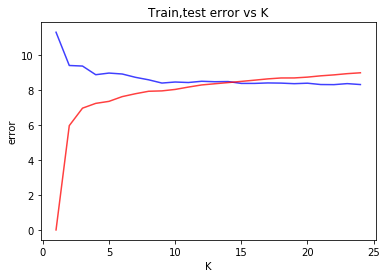

In [9]:
testError=[]
trainError=[]
test={}
K = range(1,25)
for a in K:
    knn = neighbors.KNeighborsRegressor(n_neighbors=a)
    knn.fit(X_train, y_train)
    y_predict_test = knn.predict(X_test)
    mse_test = mean_squared_error(y_test, y_predict_test)
    rmse_test = np.sqrt(mse_test)
    y_predict_train = knn.predict(X_train)
    mse_train = mean_squared_error(y_train, y_predict_train)
    rmse_train = np.sqrt(mse_train)
    trainError.append(rmse_train)
    testError.append(rmse_test)
plt.plot(K, testError, alpha=0.75, color='b')
plt.plot(K, trainError, alpha=0.75, color='r')
plt.xlabel('K')
plt.ylabel('error')
plt.title('Train,test error vs K')
plt.show()

# 2 c

In [10]:
for i in X_test:
    knn = neighbors.KNeighborsRegressor(n_neighbors=a)
    i.reshape(-1,1)
    knn.fit(X_train, y_train)
    y_predict_test = knn.predict(i)
    mse_test = mean_squared_error(y_test, y_predict_test)
    rmse_test = np.sqrt(mse_test)
    print(rmse_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.80145278 0.72707424 0.58447489 0.69552341 0.         0.19619486
 0.24088851].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.